In [1]:
import pandas as pd


In [2]:
df=pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [4]:
#there are no null values so we can go ahead 
#let's check what are the type of features available in dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
#let's see what are the values available in categorical data
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [6]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [7]:
df['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [8]:
#here in country feature only one value is available which is US so it isn't helping to count profit
#we will simply drop it
df.drop(['Country'],axis=1,inplace=True)

In [9]:
df['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

In [54]:
df['City'].value_counts()

New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Littleton            1
Atlantic City        1
Redwood City         1
Rochester Hills      1
Glenview             1
Name: City, Length: 531, dtype: int64

In [10]:
df['Postal Code'].value_counts()

10035    263
10024    230
10009    229
94122    203
10011    193
        ... 
52240      1
94509      1
53186      1
32503      1
60025      1
Name: Postal Code, Length: 631, dtype: int64

In [62]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [64]:
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [11]:
df['Profit'].describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

In [12]:
df['Postal Code'].describe()

count     9994.000000
mean     55190.379428
std      32063.693350
min       1040.000000
25%      23223.000000
50%      56430.500000
75%      90008.000000
max      99301.000000
Name: Postal Code, dtype: float64

In [13]:
df['Sales'].describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

In [14]:
#let's import all the library for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

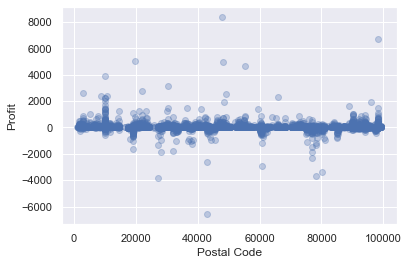

In [15]:
plt.scatter(df['Postal Code'],df['Profit'],alpha=0.3)
plt.xlabel('Postal Code')
plt.ylabel('Profit')
plt.show()

In [16]:
#postal code isn't giving any info about profit it is better to drop it
df.drop(['Postal Code'],axis=1,inplace=True)

In [17]:
datas=df.copy()


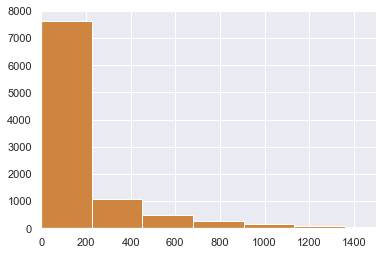

In [18]:
plt.hist(datas['Sales'],facecolor='peru',bins=100)
plt.xlim(0,1500)
plt.show()

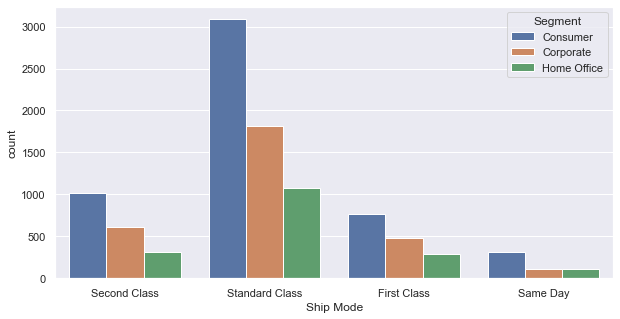

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x='Ship Mode', hue='Segment', data=df)
plt.show()

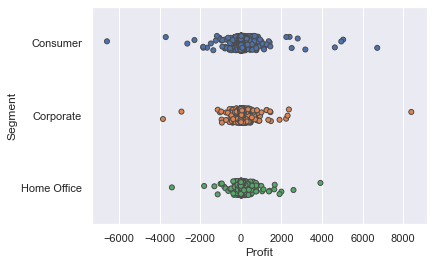

In [20]:
ax=sns.stripplot(x="Profit", y="Segment", data=df,linewidth=1)

[(-200.0, 400.0)]

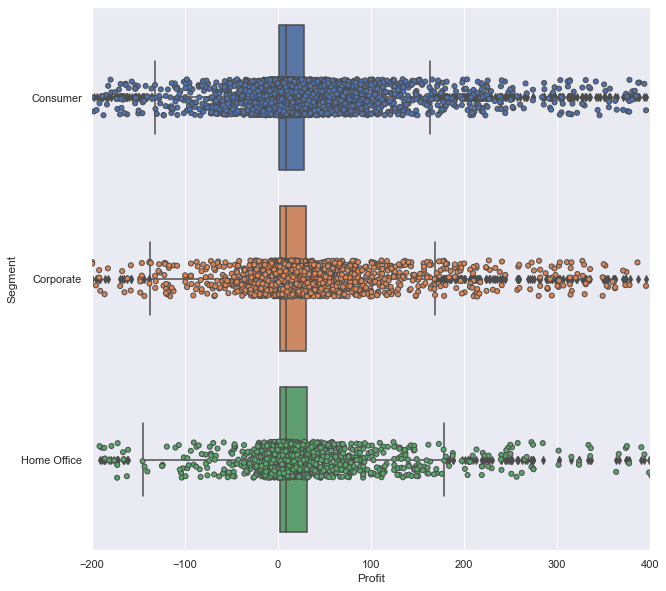

In [21]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax=sns.boxplot(x="Profit", y="Segment", data=df,whis=5,ax=ax)
ax=sns.stripplot(x="Profit", y="Segment", data=df,linewidth=1,ax=ax)
ax.set(xlim=(-200,400))

[(-200.0, 400.0)]

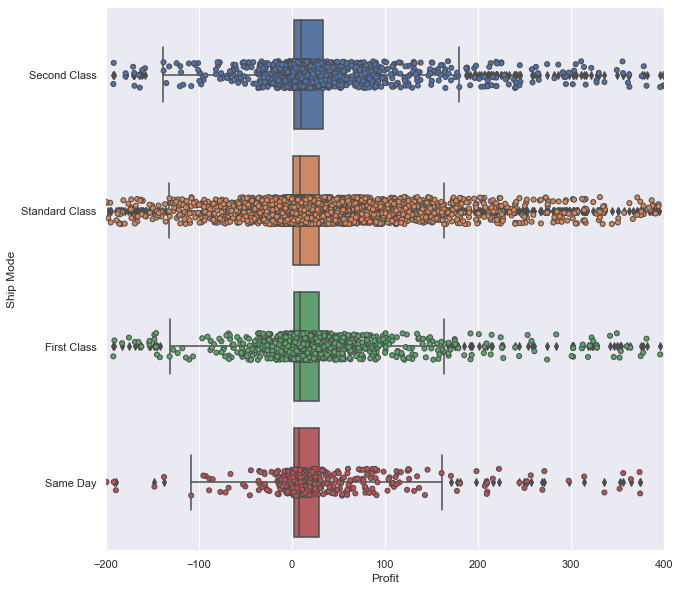

In [22]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax=sns.boxplot(x="Profit", y="Ship Mode", data=df,whis=5,ax=ax)
ax=sns.stripplot(x="Profit", y="Ship Mode", data=df,linewidth=1,ax=ax)
ax.set(xlim=(-200,400))

[(-200.0, 400.0)]

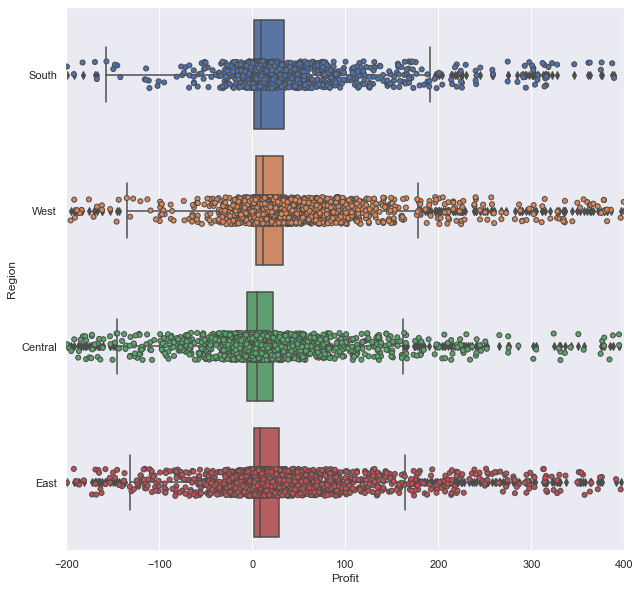

In [23]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax=sns.boxplot(x="Profit", y="Region", data=df,whis=5,ax=ax)
ax=sns.stripplot(x="Profit", y="Region", data=df,linewidth=1,ax=ax)
ax.set(xlim=(-200,400))

[(-200.0, 200.0)]

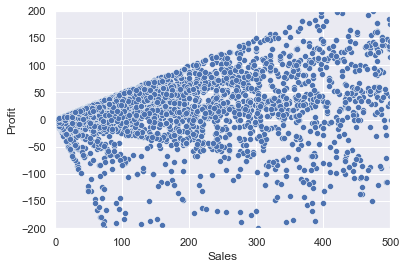

In [24]:
ax=sns.scatterplot(data=df, x="Sales", y="Profit")
ax.set(xlim=(0,500))
ax.set(ylim=(-200,200))

In [25]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [60]:
state=df.groupby('State')['Sales','Quantity','Profit'].agg('sum').reset_index()
state

<ipython-input-60-8492cbd34d0f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  state=df.groupby('State')['Sales','Quantity','Profit'].agg('sum').reset_index()


,State,Sales,Quantity,Profit
0,Alabama,19510.6400,256,5786.8253
1,Arizona,35282.0010,862,-3427.9246
2,Arkansas,11678.1300,240,4008.6871
3,California,457687.6315,7667,76381.3871
4,Colorado,32108.1180,693,-6527.8579
5,Connecticut,13384.3570,281,3511.4918
6,Delaware,27451.0690,367,9977.3748
7,District of Columbia,2865.0200,40,1059.5893
8,Florida,89473.7080,1379,-3399.3017
9,Georgia,49095.8400,705,16250.0433


In [73]:
st=df.groupby('State').agg('count').reset_index()
state['Count']=st['Sales']
state

,State,Sales,Quantity,Profit,Count
0,Alabama,19510.6400,256,5786.8253,61
1,Arizona,35282.0010,862,-3427.9246,224
2,Arkansas,11678.1300,240,4008.6871,60
3,California,457687.6315,7667,76381.3871,2001
4,Colorado,32108.1180,693,-6527.8579,182
5,Connecticut,13384.3570,281,3511.4918,82
6,Delaware,27451.0690,367,9977.3748,96
7,District of Columbia,2865.0200,40,1059.5893,10
8,Florida,89473.7080,1379,-3399.3017,383
9,Georgia,49095.8400,705,16250.0433,184


[Text(0, 0, 'Alabama'),
 Text(1, 0, 'Arizona'),
 Text(2, 0, 'Arkansas'),
 Text(3, 0, 'California'),
 Text(4, 0, 'Colorado'),
 Text(5, 0, 'Connecticut'),
 Text(6, 0, 'Delaware'),
 Text(7, 0, 'District of Columbia'),
 Text(8, 0, 'Florida'),
 Text(9, 0, 'Georgia'),
 Text(10, 0, 'Idaho'),
 Text(11, 0, 'Illinois'),
 Text(12, 0, 'Indiana'),
 Text(13, 0, 'Iowa'),
 Text(14, 0, 'Kansas'),
 Text(15, 0, 'Kentucky'),
 Text(16, 0, 'Louisiana'),
 Text(17, 0, 'Maine'),
 Text(18, 0, 'Maryland'),
 Text(19, 0, 'Massachusetts'),
 Text(20, 0, 'Michigan'),
 Text(21, 0, 'Minnesota'),
 Text(22, 0, 'Mississippi'),
 Text(23, 0, 'Missouri'),
 Text(24, 0, 'Montana'),
 Text(25, 0, 'Nebraska'),
 Text(26, 0, 'Nevada'),
 Text(27, 0, 'New Hampshire'),
 Text(28, 0, 'New Jersey'),
 Text(29, 0, 'New Mexico'),
 Text(30, 0, 'New York'),
 Text(31, 0, 'North Carolina'),
 Text(32, 0, 'North Dakota'),
 Text(33, 0, 'Ohio'),
 Text(34, 0, 'Oklahoma'),
 Text(35, 0, 'Oregon'),
 Text(36, 0, 'Pennsylvania'),
 Text(37, 0, 'Rhode Isla

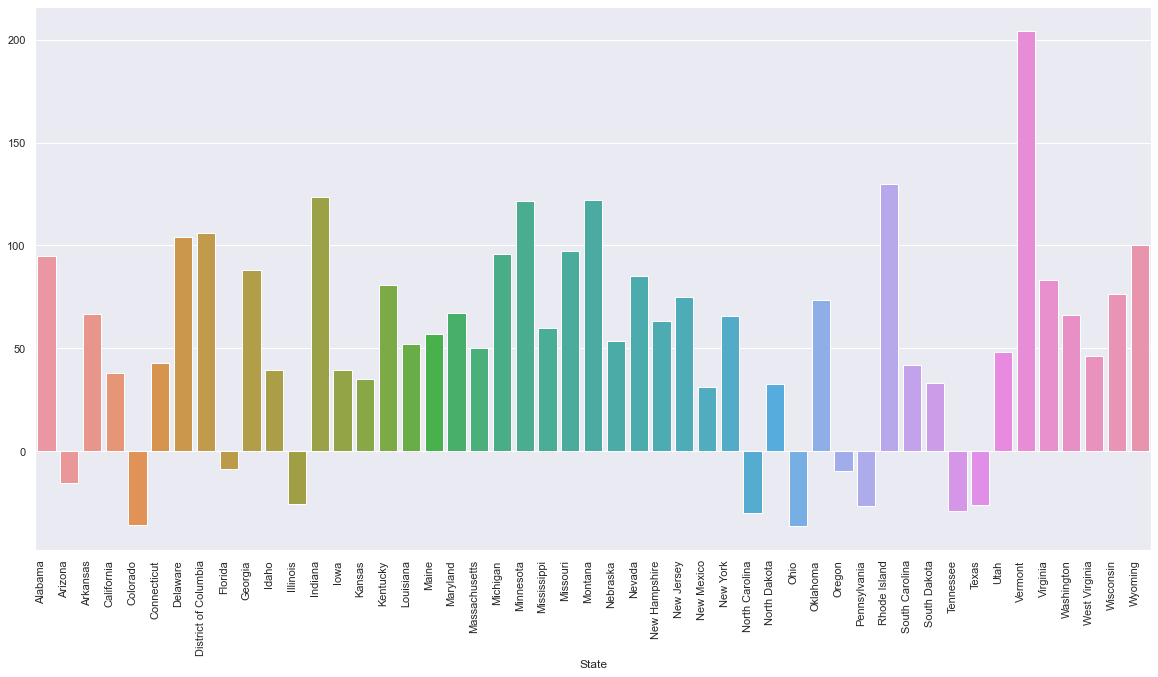

In [75]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="State", y=state["Profit"]/state["Count"], data=state,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

In [76]:
category=df.groupby('Category')['Sales','Quantity','Profit'].agg('sum').reset_index()
ct=df.groupby('Category').agg('count').reset_index()
category['Count']=ct['Sales']
category

<ipython-input-76-c3a796785f82>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  category=df.groupby('Category')['Sales','Quantity','Profit'].agg('sum').reset_index()


,Category,Sales,Quantity,Profit,Count
0,Furniture,741999.7953,8028,18451.2728,2121
1,Office Supplies,719047.0320,22906,122490.8008,6026
2,Technology,836154.0330,6939,145454.9481,1847


<AxesSubplot:xlabel='Category'>

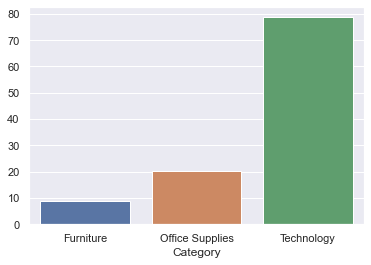

In [78]:
sns.barplot(x=category["Category"], y=category["Profit"]/category["Count"], data=state)

In [48]:
ship_mode=df.groupby('Ship Mode')['Sales','Quantity','Profit'].agg('sum').reset_index()
ship_mode

<ipython-input-48-7c80bfd0e613>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ship_mode=df.groupby('Ship Mode')['Sales','Quantity','Profit'].agg('sum').reset_index()


,Ship Mode,Sales,Quantity,Profit
0,First Class,3.514284e+05,5693,48969.8399
1,Same Day,1.283631e+05,1960,15891.7589
2,Second Class,4.591936e+05,7423,57446.6354
3,Standard Class,1.358216e+06,22797,164088.7875


[Text(0, 0, 'First Class'),
 Text(1, 0, 'Same Day'),
 Text(2, 0, 'Second Class'),
 Text(3, 0, 'Standard Class')]

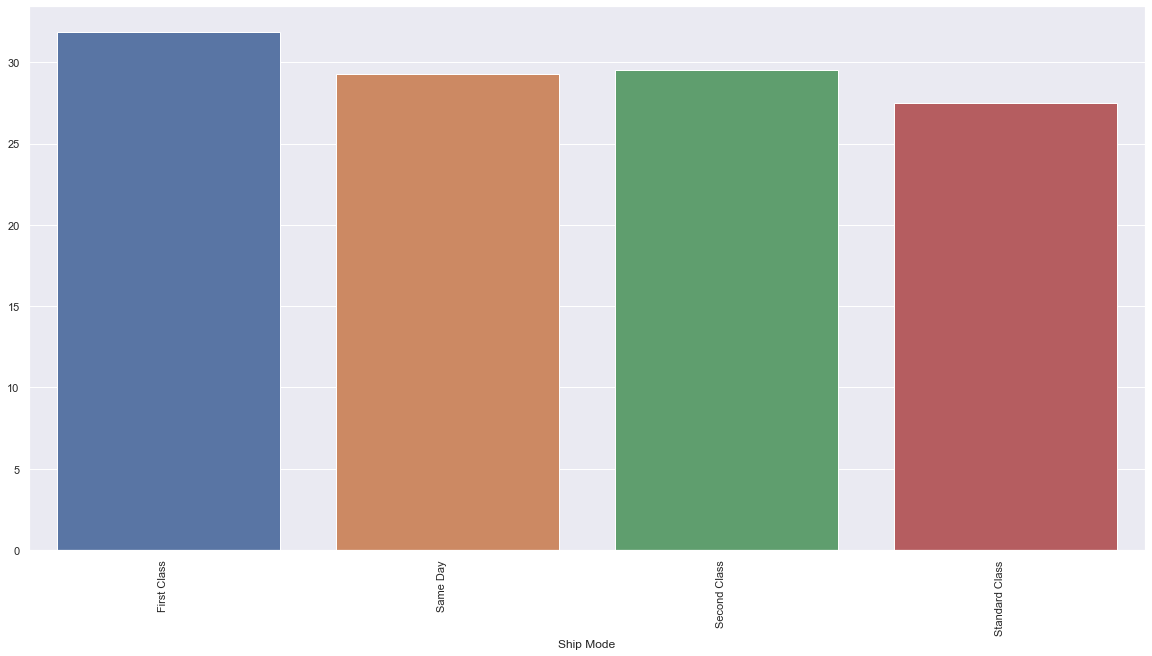

In [69]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="Ship Mode", y=ship_mode["Profit"]/ship_mode["Count"], data=ship_mode,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")



In [67]:
ship=df.groupby('Ship Mode').agg('count').reset_index()
ship
ship_mode['Count']=ship['Quantity']

In [68]:
ship_mode

,Ship Mode,Sales,Quantity,Profit,Count
0,First Class,3.514284e+05,5693,48969.8399,1538
1,Same Day,1.283631e+05,1960,15891.7589,543
2,Second Class,4.591936e+05,7423,57446.6354,1945
3,Standard Class,1.358216e+06,22797,164088.7875,5968


In [79]:
seg=df.groupby('Segment')['Sales','Quantity','Profit'].agg('sum').reset_index()
s=df.groupby('Segment').agg('count').reset_index()
seg['Count']=ct['Sales']
seg

<ipython-input-79-b34ddfe96fc0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  seg=df.groupby('Segment')['Sales','Quantity','Profit'].agg('sum').reset_index()


,Segment,Sales,Quantity,Profit,Count
0,Consumer,1.161401e+06,19521,134119.2092,2121
1,Corporate,7.061464e+05,11608,91979.1340,6026
2,Home Office,4.296531e+05,6744,60298.6785,1847


<AxesSubplot:xlabel='Segment'>

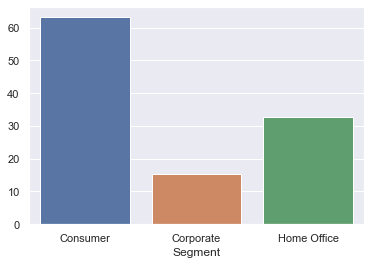

In [81]:
sns.barplot(x=seg["Segment"], y=seg["Profit"]/seg["Count"], data=seg)